# Lab 3: Compass Heading

## Reading the Raw Magnetometer Values

In [1]:
%matplotlib notebook

import board
import adafruit_bno055

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

i2c = board.I2C()
imu = adafruit_bno055.BNO055_I2C(i2c)
imu.mode = adafruit_bno055.MAGONLY_MODE

window = 100
interval = 1/20

x_raw = []
y_raw = []
z_raw = []
h = []
t = []

<IPython.core.display.Javascript object>


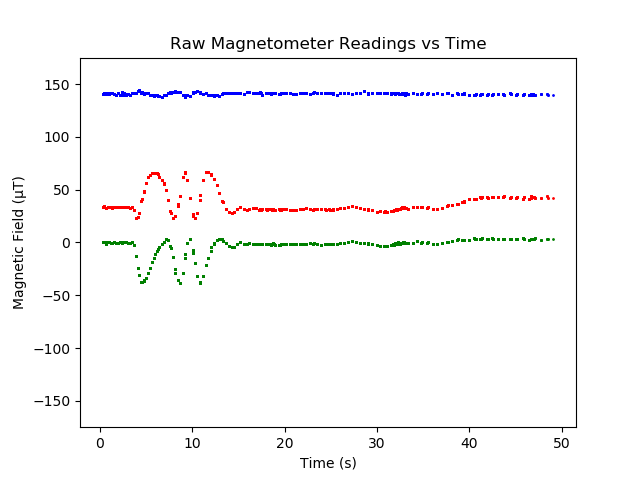

In [2]:
fig_raw, ax_raw = plt.subplots()

plt.title("Raw Magnetometer Readings vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (μT)")
plt.ylim(-175,175)

def animate(i):
    
    x, y, z = imu.magnetic

    if x is not None and y is not None and z is not None: 
        x_raw.append(x)
        y_raw.append(y)
        z_raw.append(z)

        t.append(time.monotonic()-start_time)

        ax_raw.scatter(t, x_raw, s=1, color='r')
        ax_raw.scatter(t, y_raw, s=1, color='g')
        ax_raw.scatter(t, z_raw, s=1, color='b')

start_time = time.monotonic()

x_raw.clear()
y_raw.clear()
z_raw.clear()

ani = animation.FuncAnimation(fig_raw, animate, interval=100)
plt.show()

## Using Magnetometer Readings To Get A Compass Heading

Use your hands to gently and at a moderate pace rotate the entire SCUTTLE 10 times clockwise AND 10 times counterclockwise about ALL three of its axes (x,y,z).

<IPython.core.display.Javascript object>


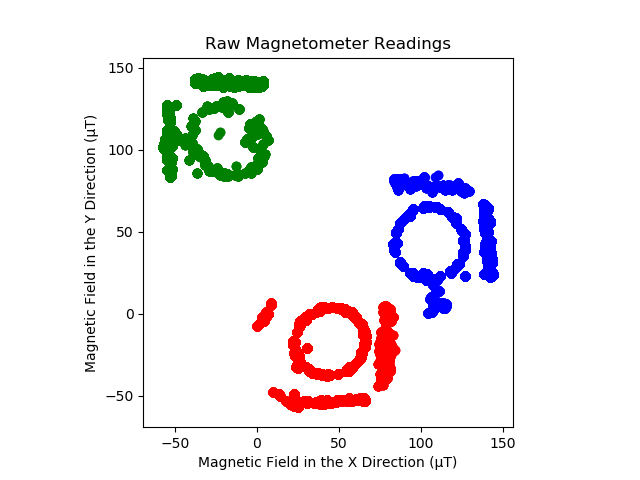

In [3]:
x_raw.clear()
y_raw.clear()
z_raw.clear()
t.clear()

fig_correlation_mag, ax_correlation_mag = plt.subplots()
ax_correlation_mag.set_aspect(1)

plt.title("Raw Magnetometer Readings")
plt.xlabel("Magnetic Field in the X Direction (μT)")
plt.ylabel("Magnetic Field in the Y Direction (μT)")

def animate(i):
    
    x, y, z = imu.magnetic

    if x is not None and y is not None and z is not None: 
        if abs(x) < 500 and abs(y) < 500 and abs(z) < 500:
            x_raw.append(x)
            y_raw.append(y)
            z_raw.append(z)

        ax_correlation_mag.scatter(x_raw, y_raw, color='r')
        ax_correlation_mag.scatter(y_raw, z_raw, color='g')
        ax_correlation_mag.scatter(z_raw, x_raw, color='b')

    plt.pause(interval)
    
ani = animation.FuncAnimation(fig_correlation_mag, animate, interval=100)
plt.show()

## Calibrate the Magnetometer

In [4]:
def calibrate_magnetometer(original_value, axis_min, axis_max):
    temp = (original_value - axis_min) / (axis_max - axis_min)
    calibrated_value = 2*temp - 1
    return calibrated_value

X range:  0.375 84.375
Y range:  -57.25 6.5625
Z range:  83.125 144.0625
Final calibration in uTesla: [[0.375, 84.375], [-57.25, 6.5625], [83.125, 144.0625]]


<IPython.core.display.Javascript object>


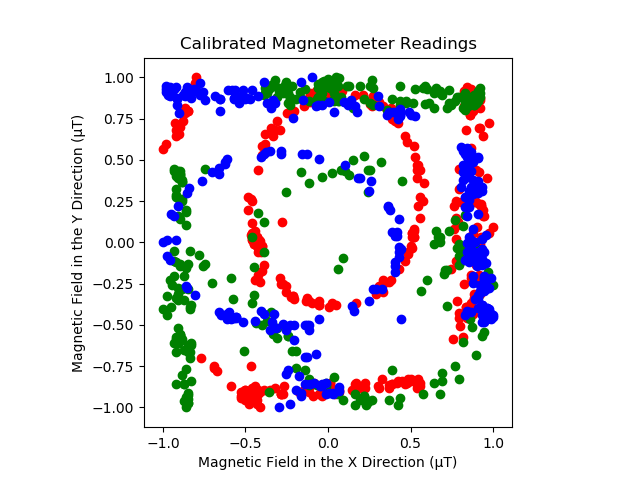

In [5]:
x_min = min(x_raw)
x_max = max(x_raw)
y_min = min(y_raw)
y_max = max(y_raw)
z_min = min(z_raw)
z_max = max(z_raw)

print("X range: ", x_min, x_max)
print("Y range: ", y_min, y_max)
print("Z range: ", z_min, z_max)

mag_calibration = [[x_min, x_max], [y_min, y_max], [z_min, z_max]]
print("Final calibration in uTesla:", mag_calibration)

cal_mag_x = [calibrate_magnetometer(x, x_min, x_max) for x in x_raw]
cal_mag_y = [calibrate_magnetometer(y, y_min, y_max) for y in y_raw]
cal_mag_z = [calibrate_magnetometer(z, z_min, z_max) for z in z_raw]

fig_calibrated_mag, ax_calibrated_mag = plt.subplots(1, 1)
ax_calibrated_mag.set_aspect(1)

plt.title("Calibrated Magnetometer Readings")
plt.xlabel("Magnetic Field in the X Direction (μT)")
plt.ylabel("Magnetic Field in the Y Direction (μT)")

# Display the now calibrated data
ax_calibrated_mag.scatter(cal_mag_x, cal_mag_y, color='r')
ax_calibrated_mag.scatter(cal_mag_y, cal_mag_z, color='g')
ax_calibrated_mag.scatter(cal_mag_z, cal_mag_x, color='b')
plt.show()

## Run Calibrated Magnetometer Readings

Gently rotate the SCUTTLE again in two direction, x and y. The output figure should look the same as the calibrated magnetometer readings above. 

<IPython.core.display.Javascript object>


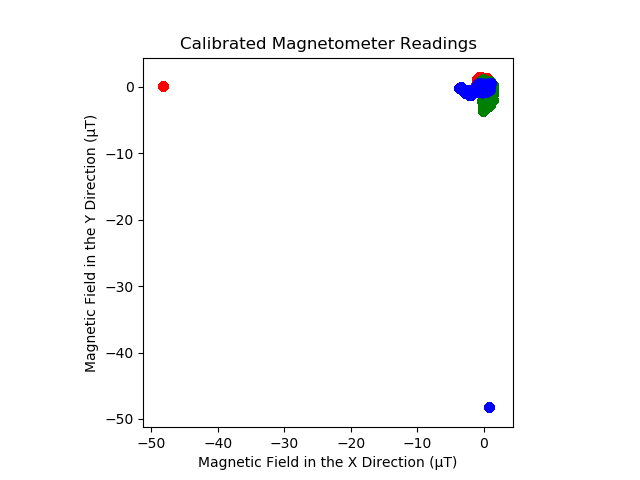

In [6]:
x_raw.clear()
y_raw.clear()
z_raw.clear()
t.clear()

fig_mag, ax_mag = plt.subplots()

plt.title("Calibrated Magnetometer Readings")
plt.xlabel("Magnetic Field in the X Direction (μT)")
plt.ylabel("Magnetic Field in the Y Direction (μT)")

ax_mag.set_aspect(1)

def animate(i):
    
    x, y, z = imu.magnetic
    
    if x is not None and y is not None and z is not None: 
        x = calibrate_magnetometer(x, x_min, x_max)
        y = calibrate_magnetometer(y, y_min, y_max)
        z = calibrate_magnetometer(z, z_min, z_max)

        if abs(x) < 500 and abs(y) < 500 and abs(z) < 500:
            x_raw.append(x)
            y_raw.append(y)
            z_raw.append(z)

        ax_mag.scatter(x_raw, y_raw, color='r')
        ax_mag.scatter(y_raw, z_raw, color='g')
        ax_mag.scatter(z_raw, x_raw, color='b')

    plt.pause(interval)
    
ani = animation.FuncAnimation(fig_mag, animate, interval=100)
plt.show()

### Calculate A Compass Heading

<IPython.core.display.Javascript object>


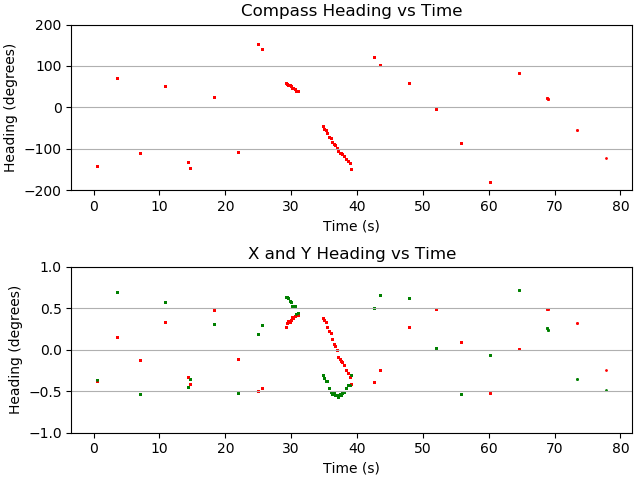

In [8]:
fig_heading, (ax_compass_heading, ax_calibrated_mag_reading) = plt.subplots(2, 1, constrained_layout=True)

ax_compass_heading.set_title("Compass Heading vs Time")
ax_compass_heading.set_xlabel("Time (s)")
ax_compass_heading.set_ylabel("Heading (degrees)")
ax_compass_heading.grid(axis = 'y')

ax_calibrated_mag_reading.set_title("X and Y Heading vs Time")
ax_calibrated_mag_reading.set_xlabel("Time (s)")
ax_calibrated_mag_reading.set_ylabel("Heading (degrees)")
ax_calibrated_mag_reading.grid(axis = 'y')

declination_angle = 7

ax_compass_heading.set_ylim(-200, 200)
ax_calibrated_mag_reading.set_ylim(-1, 1)

h.clear()
t.clear()

start_time = time.monotonic()

x_calibrated = []
y_calibrated = []

def animate(i):
    
    x, y, _ = imu.magnetic

    if x is not None and y is not None: 
        x = calibrate_magnetometer(x, x_min, x_max)
        y = calibrate_magnetometer(y, y_min, y_max)

        x_calibrated.append(x)
        y_calibrated.append(y)

        t.append(time.monotonic()-start_time)

        ax_calibrated_mag_reading.scatter(t, x_calibrated, s=1, color='r')
        ax_calibrated_mag_reading.scatter(t, y_calibrated, s=1, color='g')

        heading = np.arctan2(y,x)
        h.append(np.degrees(heading)-declination_angle)

        ax_compass_heading.scatter(t, h, s=1, color='r')
    
ani = animation.FuncAnimation(fig_heading, animate, interval=100)
plt.show()